## Pricing

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#data input
data = {
    'category': ['biggest', 'midrange', 'smallest', 'private'],
    'scan_share': [25.6, 21.2, 28.8, 14.3],
    'propensity': [0.37, 0.27, 0.27, 0.20],
    'baseline_price': [32079.70, 24676.70, 7730.05, 260314.35]
}


In [3]:
#total scan counts, inclusive of NHS and private sector scan estimates
total_scans = 65712 + 11000  

#create a dataframe
df = pd.DataFrame(data)



In [4]:
#usage share percentage, calculated 
df['weighted'] = df['scan_share'] * df['propensity']
df['usage_share'] = df['weighted'] / df['weighted'].sum()
#baseline usage/quantity, calculated from usage share and total scan counts
df['baseline_usage'] = df['usage_share'] * total_scans



In [5]:
#Iso-elastic demand formula
def demand(price, baseline_price, baseline_usage, elasticity=-0.8):
    return baseline_usage * (price / baseline_price) ** elasticity



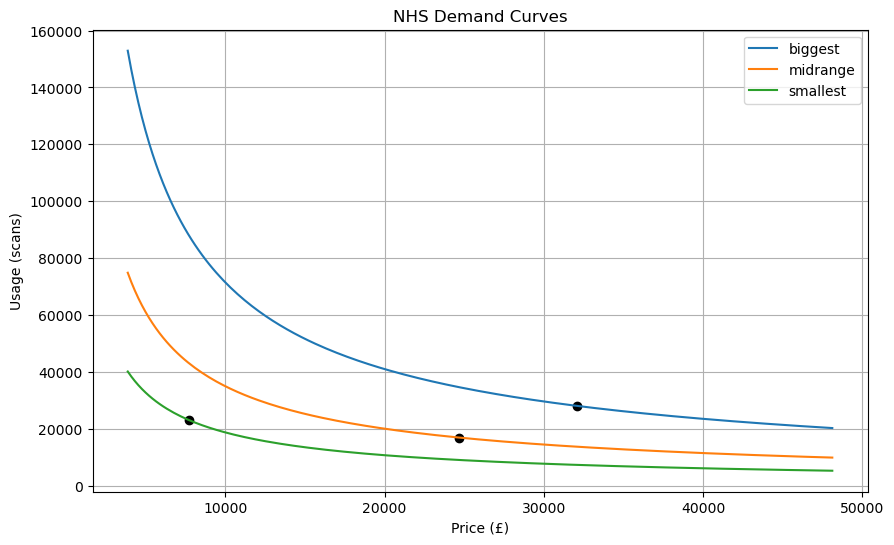

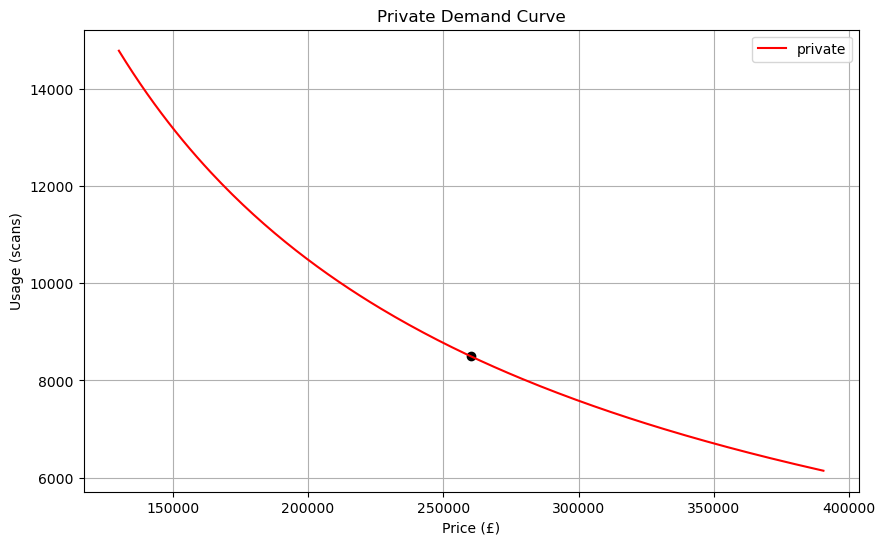

In [6]:
#NHS demand curve plotted
nhs_df = df[df['category'] != 'private']
plt.figure(figsize=(10,6))
price_range = np.linspace(nhs_df['baseline_price'].min()*0.5,
                          nhs_df['baseline_price'].max()*1.5, 200)

for _, row in nhs_df.iterrows():
    usage_curve = demand(price_range, row['baseline_price'], row['baseline_usage'])
    plt.plot(price_range, usage_curve, label=row['category'])
    plt.scatter(row['baseline_price'], row['baseline_usage'], color='k')
plt.title("NHS Demand Curves")
plt.xlabel("Price (£)")
plt.ylabel("Usage (scans)")
plt.legend()
plt.grid(True)
plt.show()

#Private demand curve plotted
priv_df = df[df['category'] == 'private']
priv_row = priv_df.iloc[0]
price_range_priv = np.linspace(priv_row['baseline_price']*0.5,
                               priv_row['baseline_price']*1.5, 200)
usage_curve_priv = demand(price_range_priv, priv_row['baseline_price'], priv_row['baseline_usage'])

plt.figure(figsize=(10,6))
plt.plot(price_range_priv, usage_curve_priv, label='private', color='red')
plt.scatter(priv_row['baseline_price'], priv_row['baseline_usage'], color='k')
plt.title("Private Demand Curve")
plt.xlabel("Price (£)")
plt.ylabel("Usage (scans)")
plt.legend()
plt.grid(True)
plt.show()

##Note: These curves can be obtained for different scan shares, adoption indices and baseline price 
## levels. This baseline price corresponds to the 60% value capture/WTP subscription model price point. 